In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('./hw4_train.csv') # donwload the train data
X = data.iloc[:,0:data.shape[1]-1] # X_train
y = data.Toughness # y_train

X_test = pd.read_csv('./hw4_test.csv') # donwload the test data

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0,test_size=0.2) # 20% for validation

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # mean to zero, standard deviation to 1
scaler.fit(np.array(y_train).reshape(-1, 1)) # set the model according to every feature respectively

y_train_scaler = scaler.transform(np.array(y_train).reshape(-1, 1)) # StandardScaler
y_val_scaler = scaler.transform(np.array(y_val).reshape(-1, 1)) # StandardScaler

In [4]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=250, random_state=0)
model.fit(X_train,y_train_scaler) # train

# (1 - u/v), u=((y_true - y_pred) ** 2).sum(), v=((y_true - y_true.mean()) ** 2).sum()
testing_score = model.score(X_val,y_val_scaler) 
print('testing scores : ',testing_score)

C:\Users\ICLab_Brian\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


testing scores :  0.916241925819211


In [5]:
from sklearn.metrics import mean_squared_error

y_val_pred = model.predict(X_val) # predict validation

print('MSE : ',mean_squared_error(y_val_scaler,y_val_pred)) # calculate MSE

MSE :  0.09160529844185669


In [6]:
y_pred = model.predict(X_test) # predict

y_pred = scaler.inverse_transform(y_pred) # inverse StandardScaler

y_pred_pd = pd.DataFrame(data=y_pred, columns=['Toughness'])
y_pred_pd = y_pred_pd.reset_index()
y_pred_pd.to_csv('n96084094_HW4_1.csv',index=False) # save the data

In [7]:
# Fully connected (Dense)
from keras import models
from keras import layers

model = models.Sequential() # set model
model.add(layers.Dense(16, activation='relu', input_shape=(64,))) # 16 output 
model.add(layers.Dense(16, activation='relu')) # 16 output 
model.add(layers.Dense(1, activation='linear')) # 1 output, y = a(wx + b), a = 1

In [8]:
model.compile(optimizer='rmsprop',
              loss='mean_squared_error', # regression problems
              metrics=['mse']) # regression problems, MSE, MAE, MAPE, Cosine, not accuracy

In [9]:
history = model.fit(X_train, y_train_scaler, epochs=250, batch_size=1000, validation_data=(X_val, y_val_scaler))

Epoch 1/250
16/16 [==============================] - 0s 14ms/step - loss: 1.1630 - mse: 1.1630 - val_loss: 1.1278 - val_mse: 1.1278
Epoch 2/250
16/16 [==============================] - 0s 6ms/step - loss: 0.9940 - mse: 0.9940 - val_loss: 1.0313 - val_mse: 1.0313
Epoch 3/250
16/16 [==============================] - 0s 6ms/step - loss: 0.8798 - mse: 0.8798 - val_loss: 0.8857 - val_mse: 0.8857
Epoch 4/250
16/16 [==============================] - 0s 6ms/step - loss: 0.7319 - mse: 0.7319 - val_loss: 0.7252 - val_mse: 0.7252
Epoch 5/250
16/16 [==============================] - 0s 7ms/step - loss: 0.6057 - mse: 0.6057 - val_loss: 0.6046 - val_mse: 0.6046
Epoch 6/250
16/16 [==============================] - 0s 7ms/step - loss: 0.5155 - mse: 0.5155 - val_loss: 0.5209 - val_mse: 0.5209
Epoch 7/250
16/16 [==============================] - 0s 6ms/step - loss: 0.4480 - mse: 0.4480 - val_loss: 0.4509 - val_mse: 0.4509
Epoch 8/250
16/16 [==============================] - 0s 3ms/step - loss: 0.3961 - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0630 - mse: 0.0630 - val_loss: 0.0734 - val_mse: 0.0734
Epoch 64/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0652 - mse: 0.0652 - val_loss: 0.0685 - val_mse: 0.0685
Epoch 65/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0628 - mse: 0.0628 - val_loss: 0.0668 - val_mse: 0.0668
Epoch 66/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0623 - mse: 0.0623 - val_loss: 0.0679 - val_mse: 0.0679
Epoch 67/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0618 - mse: 0.0618 - val_loss: 0.0660 - val_mse: 0.0660
Epoch 68/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0613 - mse: 0.0613 - val_loss: 0.0702 - val_mse: 0.0702
Epoch 69/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0607 - mse: 0.0607 - val_loss: 0.0657 - val_mse: 0.0657
Epoch 70/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0602 - mse: 0

Epoch 125/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0414 - mse: 0.0414 - val_loss: 0.0613 - val_mse: 0.0613
Epoch 126/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0411 - mse: 0.0411 - val_loss: 0.0515 - val_mse: 0.0515
Epoch 127/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0397 - mse: 0.0397 - val_loss: 0.0539 - val_mse: 0.0539
Epoch 128/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0525 - val_mse: 0.0525
Epoch 129/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0405 - mse: 0.0405 - val_loss: 0.0526 - val_mse: 0.0526
Epoch 130/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0532 - val_mse: 0.0532
Epoch 131/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0522 - val_mse: 0.0522
Epoch 132/250
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0485 - val_mse: 0.0485
Epoch 187/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 188/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0501 - val_mse: 0.0501
Epoch 189/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 190/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0494 - val_mse: 0.0494
Epoch 191/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0530 - val_mse: 0.0530
Epoch 192/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0355 - mse: 0.0355 - val_loss: 0.0519 - val_mse: 0.0519
Epoch 193/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0333 -

Epoch 248/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0491 - val_mse: 0.0491
Epoch 249/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0492 - val_mse: 0.0492
Epoch 250/250
16/16 [==============================] - 0s 3ms/step - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0487 - val_mse: 0.0487


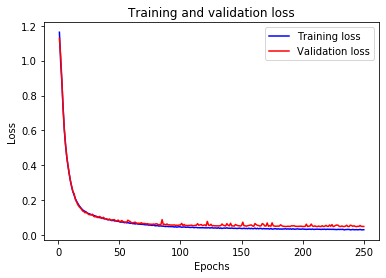

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1) # x-axis

plt.plot(epochs, loss, 'b', label='Training loss')  # y-axis, loss
plt.plot(epochs, val_loss, 'r', label='Validation loss') # y-axis, , loss
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
y_pred = model.predict(X_test)

y_pred=scaler.inverse_transform(y_pred)  # inverse StandardScaler

y_pred_pd = pd.DataFrame(data=y_pred, columns=['Toughness'])
y_pred_pd = y_pred_pd.reset_index()
y_pred_pd.to_csv('n96084094_HW4_2.csv',index=False)